# CSIT456 Lab 2: Linear Model for Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10


We will be using a very popular advertising dataset about various costs incurred on advertising by different mediums and the sales for a particular product. 

In [2]:
ad = pd.read_csv('Advertising.csv',index_col=0) 
ad[ad.columns[0]]
ad

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### Plot and describe the data set

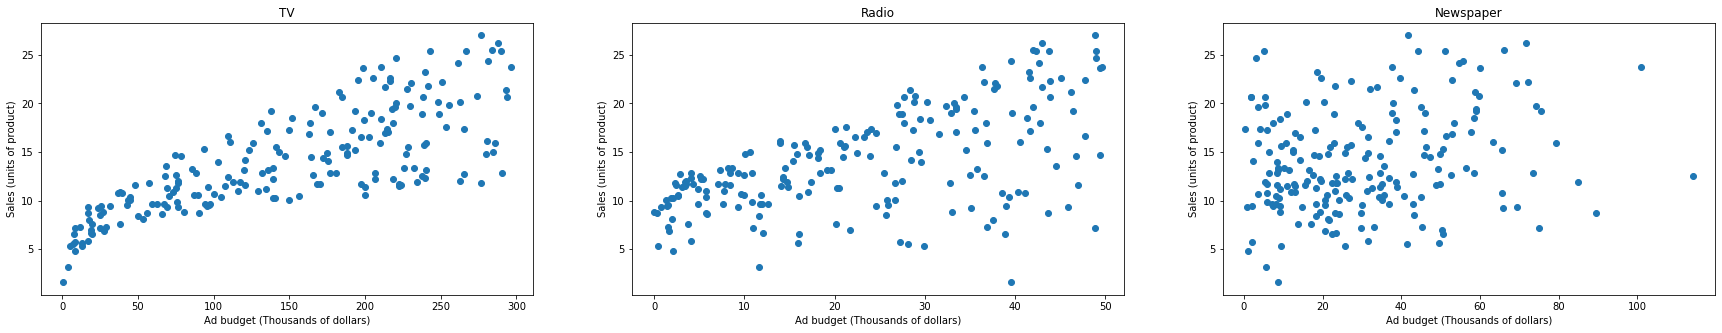

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(30,5))
for i,ax in enumerate (axes.ravel()):
    ax.scatter (x=ad[ad.columns[i]],y=ad["Sales"])
    ax.set_title(ad.columns[i])
    ax.set_xlabel('Ad budget (Thousands of dollars)')
    ax.set_ylabel('Sales (units of product)')
    

In [4]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Question 1 [5 points] 
Convert the format of the data set and split it to predictors and variables

1. Predictor variables:
Create the numpy ndarray **X** which contains the data of the columns 'TV', 'Radio', and 'Newspaper' in **ad**.
2. Target variable:
Create the numpy ndarray **y** which contains the data of the columns 'Sales' in **ad**. Note that **y** should be a vector with 200 rows and 1 column. 

In [5]:
x = ad[["TV","Radio","Newspaper"]].values
y= ad['Sales'].values
y = y.reshape(-1,1)
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

### Question 2 Fitting a linear regression model for one feature: TV cost VS Sales

#### Question 2.1 [5 points]
Prepare the data as the following steps:
1. Create **X_tv** for the values of the cost in TV, which should be the data in the first column of **X**.
2. Split the data to train set (70%) and test set (30%). 

In [6]:
x_tv = x[:,0]
x_tv = x_tv.reshape(-1,1)
x_tv

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tv,y,test_size=0.3,random_state=42)

#### Question 2.2 [5 points]
Create a linear regression model that outputs a predication of sales based on the advertisement cost on TV.

Print the score of your model as well.

In [7]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(x_train,y_train)
reg_all.score(x_test,y_test)

0.6714477229302763

#### Question 2.3 [5 points]
Use your model to plot the advertisement cost on TV versus the sales. 

Set the range of the cost between 0 and 300.

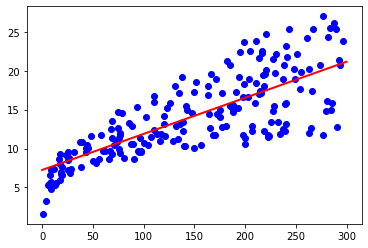

In [8]:
pred_x = np.linspace(0,300).reshape(-1,1)
pred_y = reg_all.predict(pred_x)

plt.scatter(x_tv,y,color='blue')
plt.plot(pred_x,pred_y,color='red',linewidth=2)

### Question 3. Multiple regression models for all features

#### Question 3.1 [5 points]
Prepare the data as the following steps:
1. Create **X** for the values of the cost in TV, which should be the data in the first column of **X**.
2. Split the data to train set (70%) and test set (30%). 

In [9]:
x = x[:,0]
x = x.reshape(-1,1)
x

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#### Question 3.2 [5 points] Apply Linear regression
Create a linear regression model **reg** based on the train set.

In [10]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Question 3.3 [8 points] Apply Ridge regression
Create a ridge regression model **ridge** based on the train set. Use grid search and 10-fold cross-validation to select the best value of **alpha**. Set the range of **alpha** from 0.001 to 1.

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid= {'alpha': np.logspace(-3,1,10)}
grid_ridge= GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_ridge.fit(x_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [12]:
ridge_alpha = grid_ridge.best_params_
ridge_alpha

{'alpha': 10.0}

#### Question 3.4 [8 points] Apply Lasso regression
Create a Lasso regression model **lasso** based on the train set. Use grid search and 10-fold cross-validation to select the best value of **alpha**. 

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso(alpha=0.1,normalize=True)
param_grid = {'alpha': np.logspace(-3,1,10)}
grid = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid.fit(x_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [14]:
lasso_alpha=grid.best_params_
lasso_alpha

{'alpha': 10.0}

#### Question 3.5 [4 points] Compare the scores of three linear models
Test each model by the test sety and get the scores (coefficient of determination R^2 of the prediction). 

In [15]:
pred_x = np.linspace(0,300).reshape(-1,1)
pred_y = reg_all.predict(pred_x)

In [16]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha, ')
results.plot('Tv', 'Costs',ax=plt.gca())

plt.legend()
plt.plot(pred_x,pred_y,color='red',linewidth=2)

KeyError: 'param_alpha, '